<center><h2>Quantum Scattering by a Coulomb Field</h2></center>

Use of scientific packages to calculate the analytic expression for the Coulomb scattering Wave Function. Note: <em>CoulWF.py</em> is a  numerical calculation of the Coulomb wave functions using complex numbers.

The radial equation for  pure Coulomb scattering is a solution of the equation: 

$$
\frac{1}{r^2}\frac{d}{dr}\Bigl ( r^2\frac{d R_\ell}{dr}\Bigr ) +
\Bigl [ k^2-\frac{2nk}{r}-\frac{\ell(\ell +1)}{r^2} \Bigr ] R_\ell = 0,
$$ 

By substituting $R_\ell (r) =  r^\ell e^{ikr}f_\ell(r)$, we obtain an equation equivalent to the 
for the confluent hypergeometric function:
$$
r\frac{d^2f_\ell}{dr^2}+[2ikr+2(\ell+1)]\frac{df_\ell}{dr}+ [2ik(\ell+1)-2nk]f_\ell = 0\\
 z\frac{ d^2 F}{dz^2}+(b-z)\frac{dF}{dz}-aF = 0.
$$
The regular solution  

$$f_\ell  =  C_\ell F(\ell+1+in,2\ell +2,-2ikr)\quad C_\ell =  \frac{(2ik)^\ell e^{-n\pi/2} \Gamma(\ell + 1 +in)}{v^{1/2} (2\ell)!}$$

is called  $1F1$. The radial wavefunction is then:
$$
R_\ell(r) =  r^\ell e^{ikr}\frac{(2ik)^\ell e^{-n\pi/2} \Gamma(\ell + 1 +in)}{v^{1/2} (2\ell)!}  F(\ell+1+in,2\ell +2,-2ikr)
$$

This program uses a computer package (for example <em>mpmath</em> but not <em>scipy</em>) to compute   $1F1$ for complex arguments. The gamma function $\Gamma (\ell+1+in)$ for complex argument can be computed with <em>scipy</em>.  

Computed are the  real parts of the S, P, and D wave functions  for   alpha particle  (Z = 2, m = 4.002602 u) scattering by a by gold nucleus (Z = 79, m = 196.966569 u).

161 161


<IPython.core.display.Javascript object>


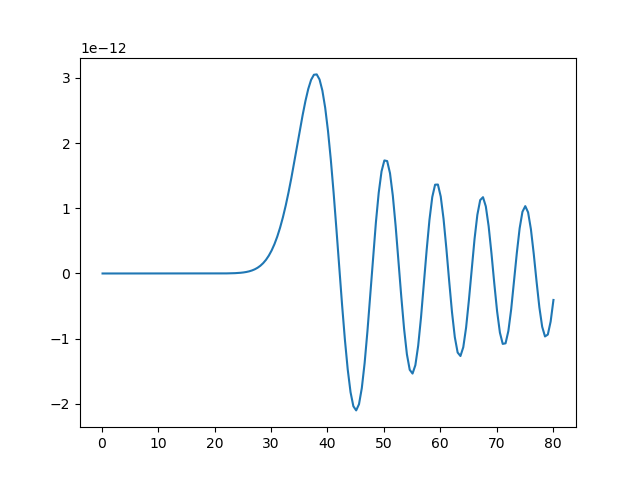

In [1]:
"" "From COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS",
    "    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    "    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia,
    "    C Bordeianu, Univ Bucharest, 2020.
    "    Please respect copyright & acknowledge our work. ""
    
# QuantumCoulScatt.ipynb: The wavefunction for Coulomb scattering

% matplotlib notebook
from scipy import special
from mpmath import * # for use of 1f1 with complex arguments
import matplotlib.pyplot as plt
import numpy as np
from math import *

Rea = np.zeros((161),complex)  # wavefunction  
elab = 7.07  # alpha lab energy in MeV
tmas =  196.966569     # mass gold 
pmas =  4.002602       # mass alpha 
ecm = elab*tmas/(pmas+tmas)  # COM energy (MeV)
redmas = pmas*tmas*931.494/(pmas+tmas) # reduced mass (MeV)
hbarc = 197.33   # MeV-fm  
ka = sqrt(2.0*redmas*ecm)/hbarc  # wave number in fm
zeb = 79              # atomic number gold
zep = 2               # atomic number alpha particle
etaco = zep*zeb*redmas/(hbarc*ka*137.)
expnpi = exp(-0.5*pi*etaco)  # factor 
ii = complex(0,1.0)           # symbol for sqrt(-1)
veloc = 3e23*hbarc*ka/redmas  # in fm/sec
theta = 0.                    # angle in degrees
radi = theta*pi/180.          # convert angle to radians
cost = cos(radi)              # cos(radi)

def wavf():  
  i = 0
  for r in np.arange(0.1,80.5,.5): # distance
    rho = complex(0,-2.0*ka*r)       # -2ikr
    expo = complex(cos(ka*r),sin(ka*r))   # exp(ikr)
    suma = 0
    for el in range(0,10):   # partial waves
        a = el+1.0+etaco*ii
        sol = hyp1f1(a,2*el+2.,rho) # hypergeometric complex arguments
        rhoel = (-rho)**el     # rho**l
        factor = rhoel*expo    # two factors
        gam = special.gamma(a)  # gamma(i+el+in)
        tor = factorial(2*el)   # (2n)!
        upar = factor*sol*gam/tor
        lep = special.eval_legendre(el,cost) #leg polynomial cos(theta)
        suma = suma+upar*lep  # sum partial waves
    Rea[i] = suma*expnpi/sqrt(veloc)  #complex wave function
    i += 1
  return Rea
         
rr = np.arange(0.1,80.5,0.5)
print(len(rr),len(Rea[ :]))
Rea = wavf()
plt.plot(rr,Rea.real) # plot real part wave function
plt.show()       